<a href="https://colab.research.google.com/github/spalominor/UWorks/blob/main/Taller_Estad%C3%ADstica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 2: Estadística Descriptiva
Introducción al Análisis de Decisiones 2025-2
Realizado por Samuel Palomino Restrepo

Importar las librerias necesarias

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Leer el archivo de excel con los datos

In [28]:
# Leemos el archivo de excel cargado al entorno
df_wine = pd.read_excel("/content/WineQuality.xlsx")

# Verificamos que se haya leído correctamente
df_wine.head(3)

,Calidad del Vino,Acidez Fija,Acidez Volátil,Ácido Cítrico,Azúcar Residual,Cloruros,Dióxido de Azúfre Libre,Dióxido de Azúfre Total,Densidad,pH,Sulfatos,Alcohol,Procedencia
0,6 Puntos,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Región Sur
1,6 Puntos,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Región Central
2,6 Puntos,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Región Norte


# Variables categóricas

I.	Indique el tipo de variable que corresponde a cada columna de la base de datos, si es categórica o numérica.

En este caso, variables **categóricas** el tipo *object* y  para **numéricas** el tipo *float64*

In [29]:
# Imprimimos la información básica del DataFrame
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Calidad del Vino         4898 non-null   object 
 1   Acidez Fija              4898 non-null   float64
 2   Acidez Volátil           4898 non-null   float64
 3   Ácido Cítrico            4898 non-null   float64
 4   Azúcar Residual          4898 non-null   float64
 5   Cloruros                 4898 non-null   float64
 6   Dióxido de Azúfre Libre  4898 non-null   float64
 7   Dióxido de Azúfre Total  4898 non-null   float64
 8   Densidad                 4898 non-null   float64
 9   pH                       4898 non-null   float64
 10  Sulfatos                 4898 non-null   float64
 11  Alcohol                  4898 non-null   float64
 12  Procedencia              4898 non-null   object 
dtypes: float64(11), object(2)
memory usage: 497.6+ KB


II.	Realice un histograma con la variable Calidad del Vino y contabilice cuantas veces aparece cada vino. Realice una tabla de frecuencias y probabilidad según la Calidad del Vino

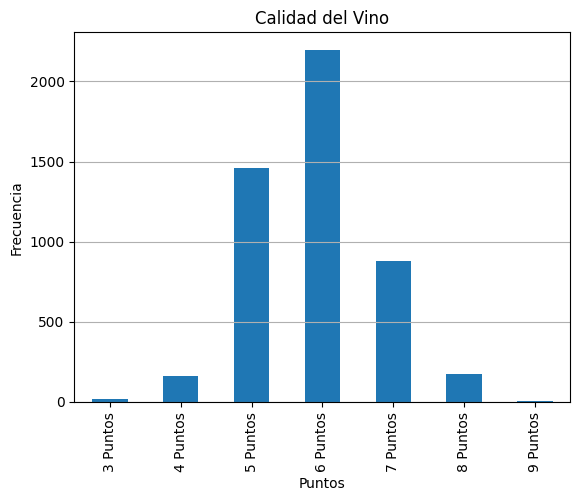

In [30]:
# Contar cuántos vinos hay en cada categoría de calidad
counts = df_wine['Calidad del Vino'].value_counts().sort_index()

# Crear gráfico de barras
ax = counts.plot(kind='bar')

# Añadir etiquetas y título
ax.set_title('Calidad del Vino')
ax.set_xlabel('Puntos')
ax.set_ylabel('Frecuencia')
ax.grid(axis='y')

# Mostrar gráfico
plt.show()

In [31]:
# Calcular la probabilidad (frecuencia relativa)
prob = counts / counts.sum()

# Construir la tabla
tabla_frecuencia = pd.DataFrame({
    'Calidad del Vino': counts.index,
    'Frecuencia': counts.values,
    'Probabilidad': prob.values
})

# Mostrar la tabla
tabla_frecuencia

,Calidad del Vino,Frecuencia,Probabilidad
0,3 Puntos,20,0.004083
1,4 Puntos,163,0.033279
2,5 Puntos,1457,0.297468
3,6 Puntos,2198,0.448755
4,7 Puntos,880,0.179665
5,8 Puntos,175,0.035729
6,9 Puntos,5,0.001021


III.	Elabore una gráfica de barras de probabilidad de la variable Calidad del Vino.

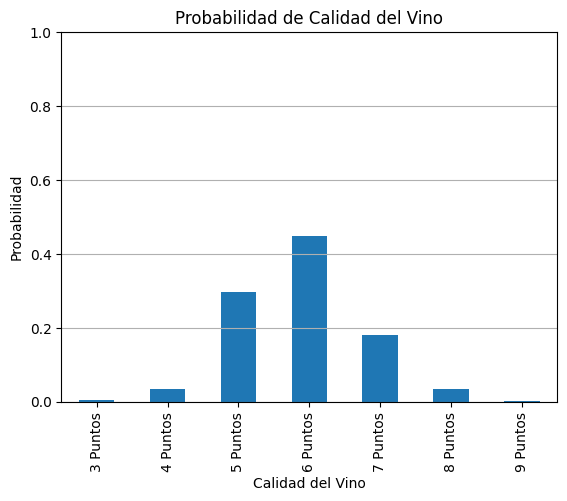

In [32]:
ax = prob.plot(kind='bar')

# Añadir etiquetas y título
ax.set_title('Probabilidad de Calidad del Vino')
ax.set_xlabel('Calidad del Vino')
ax.set_ylabel('Probabilidad')
ax.grid(axis='y')

# Escala de 0 a 1 en el eje Y
ax.set_ylim(0, 1)

# Mostrar la gráfica
plt.show()

IV.	Responda cuál es la probabilidad de que si escogemos al azar un dato sea 6 Puntos o 7 Puntos:

In [39]:
# Sumar las probabilidades independientes
prob_6_7 = prob.loc['6 Puntos'] + prob.loc['7 Puntos']

# Imprimir el resultado
print(f"La probabilidad de obtener 6 o 7 puntos es: {prob_6_7:.2f}")


La probabilidad de obtener 6 o 7 puntos es: 0.63


V.	Análisis cruzado de variables categóricas: Haga una tabla dinámica en Python que combine la Procedencia del vino con la Calidad y muestre el azúcar promedio de los vinos por procedencia y calidad.

In [45]:
# Agrupar por Procedencia y Calidad, y calcular el promedio de Azúcar
table = pd.pivot_table(
    df_wine,
    values='Azúcar Residual',
    index='Procedencia',
    columns='Calidad del Vino',
    aggfunc='mean',
    margins=True
)

# Mostrar el resultado
table

Calidad del Vino,3 Puntos,4 Puntos,5 Puntos,6 Puntos,7 Puntos,8 Puntos,9 Puntos,All
Procedencia,,,,,,,,
Región Central,4.6300,4.985833,7.153306,6.427335,4.995380,5.728571,3.10,6.285666
Región Norte,7.8400,4.147458,7.306304,6.410662,5.397030,6.086111,1.60,6.383873
Región Sur,8.4700,4.785227,7.532066,6.488811,5.164964,5.277692,6.40,6.506428
All,6.3925,4.628221,7.334969,6.441606,5.186477,5.671429,4.12,6.391415


# Variables numéricas

VI.	Obtenga para la variable Alcohol los siguientes estadísticos: Media, mediana, desviación estándar, varianza, moda, mínimo, máximo, rango.

In [47]:
# Extraer la columna Alcohol del DataFrame
alcohol = df_wine['Alcohol']

# Calcular los estadísticos
media = alcohol.mean()
mediana = alcohol.median()
desviacion = alcohol.std()
varianza = alcohol.var()
moda = alcohol.mode().iloc[0]   # Puede haber varias modas
minimo = alcohol.min()
maximo = alcohol.max()
rango = maximo - minimo

# Organizar los datos en una tabla
stadistics = pd.DataFrame({
    'Estadístico': [
        'Media', 'Mediana', 'Desviación estándar', 'Varianza',
        'Moda', 'Mínimo', 'Máximo', 'Rango'
    ],
    'Valor': [
        media, mediana, desviacion, varianza,
        moda, minimo, maximo, rango
    ]
})

# Mostrar el resultado
stadistics

,Estadístico,Valor
0,Media,10.514267
1,Mediana,10.400000
2,Desviación estándar,1.230621
3,Varianza,1.514427
4,Moda,9.400000
5,Mínimo,8.000000
6,Máximo,14.200000
7,Rango,6.200000


VII.	Elabore un histograma de frecuencia de la variable Alcohol con 10 intervalos y haga también una gráfica acumulativa.

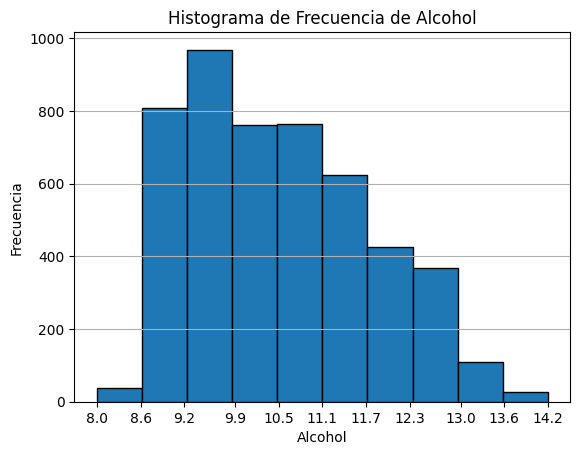

In [54]:
# Crear el histograma de frecuencias con 10 intervalos
_, bins, _ = plt.hist(df_wine['Alcohol'], bins=10, edgecolor='black')

# Añadir etiquetas y título
plt.title('Histograma de Frecuencia de Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')

# Configurar la cuadrícula
plt.grid(axis='y')

# Asignar los valores al eje y
plt.xticks(bins.round(1))

# Mostrar la gráfica
plt.show()

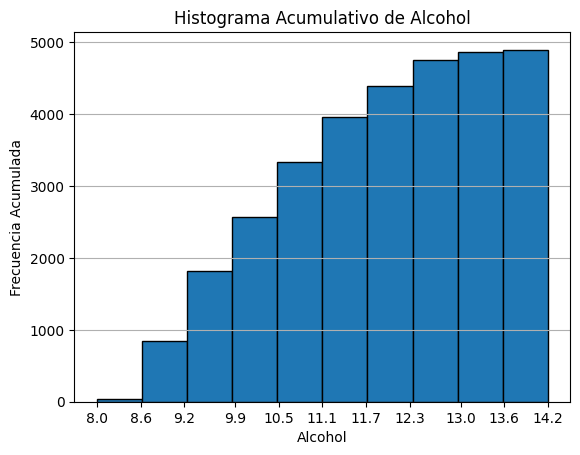

In [56]:
# Histograma acumulativo con 10 intervalos
_, bins, _ = plt.hist(df_wine['Alcohol'],
                      bins=10,
                      cumulative=True,
                      edgecolor='black')

# Añadir etiquetas y título
plt.title('Histograma Acumulativo de Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia Acumulada')

# Configurar la cuadrícula
plt.grid(axis='y')

# Asignar los valores al eje y
plt.xticks(bins.round(1))

# Mostrar la gráfica
plt.show()

a.	¿Cuál es la probabilidad de que un vino tenga menos de 11 grados de alcohol?

b.	¿Cuál es la probabilidad de que un vino tenga más grados de ese mismo valor?

In [64]:
# Calcular la probabilidad
p_menor_11 = round(alcohol[alcohol < 11].count() / len(alcohol), 2)
p_mayor_11 = round(alcohol[alcohol > 11].count() / len(alcohol), 2)
p_igual_11 = round(alcohol[alcohol == 11].count() / len(alcohol), 2)
p_total = p_menor_11 + p_mayor_11 + p_igual_11

# Imprimir los resultados
print(f"Probabilidad de Alcohol < 11: {p_menor_11:.2f}")
print(f"Probabilidad de Alcohol > 11: {p_mayor_11:.2f}")
print(f"Probabilidad de Alcohol = 11: {p_igual_11:.2f}")

# Verificar si la suma es igual a 1
print(f"{p_menor_11} + {p_mayor_11} + {p_igual_11} = {p_total}")

Probabilidad de Alcohol < 11: 0.65
Probabilidad de Alcohol > 11: 0.32
Probabilidad de Alcohol = 11: 0.03
0.65 + 0.32 + 0.03 = 1.0


VIII.	A partir del histograma de frecuencias calculado en la pregunta anterior, encuentre el valor medio de la variable Alcohol, utilice el siguiente ejemplo como apoyo para encontrar la media.

In [78]:
# Construir histograma con 10 intervalos
frecuencias, bins = np.histogram(df_wine['Alcohol'], bins=10)

# Calcular marcas de clase
marcas = (bins[:-1] + bins[1:]) / 2

# Calcular productos
productos = marcas * frecuencias

# Formatear los intervalos
intervalos = [f"[{round(bins[i],2)} - {round(bins[i+1],2)})" for i in range(
    len(frecuencias))]

# Crear tabla resumen
tabla_hist = pd.DataFrame({
    'Intervalo': intervalos,
    'Marca de clase': marcas,
    'Frecuencia': frecuencias,
    'Producto marca*frecuencia': productos
})

# Calcular media aproximada
media_hist = productos.sum() / frecuencias.sum()

# Mostrar los resultados
print(tabla_hist)
print(f"\nTotal productos (marca*frecuencia): {sum(productos):.2f}")
print(f"Total frecuencias: {sum(frecuencias)}")
print(f"\nMedia de Alcohol (aprox. por histograma): {media_hist:.2f}")

         Intervalo  Marca de clase  Frecuencia  Producto marca*frecuencia
0     [8.0 - 8.62)            8.31          37                     307.47
1    [8.62 - 9.24)            8.93         808                    7215.44
2    [9.24 - 9.86)            9.55         969                    9253.95
3   [9.86 - 10.48)           10.17         761                    7739.37
4   [10.48 - 11.1)           10.79         765                    8254.35
5   [11.1 - 11.72)           11.41         625                    7131.25
6  [11.72 - 12.34)           12.03         427                    5136.81
7  [12.34 - 12.96)           12.65         368                    4655.20
8  [12.96 - 13.58)           13.27         110                    1459.70
9   [13.58 - 14.2)           13.89          28                     388.92

Total productos (marca*frecuencia): 51542.46
Total frecuencias: 4898

Media de Alcohol (aprox. por histograma): 10.52


Compare con la media encontrada en el numeral VI ¿Se incurre mucho en error? ¿Por qué?

In [76]:
# Reasignar las medias
media_real = df_wine['Alcohol'].mean()
media_aprox = media_hist

# Calcular errores
error_absoluto = abs(media_real - media_aprox)
error_porcentual = (error_absoluto / media_real) * 100

print(f"Media real: {media_real:.2f}")
print(f"Media aproximada (histograma): {media_aprox:.2f}")
print(f"Error absoluto: {error_absoluto:.2f}")
print(f"Error porcentual: {error_porcentual:.2f}%")

Media real: 10.51
Media aproximada (histograma): 10.52
Error absoluto: 0.01
Error porcentual: 0.08%


Este procedimiento es análogo a las sumas de Riemann frente a una integral:
en lugar de considerar la continuidad de los datos, se toma un valor representativo
en cada intervalo y se estima el área (o, en este caso, el promedio).

Mientras que el cálculo exacto de la media recorre cada valor individual, la
aproximación agrupada reemplaza toda la variabilidad de cada intervalo por un único
valor. Esto genera una pérdida de precisión que, aunque puede ser pequeña en
distribuciones simétricas y con intervalos estrechos, se vuelve significativa si
los intervalos son muy anchos o la distribución interna de los datos es asimétrica.